In [1]:
import numpy as np
import pandas as pd
import sklearn.neighbors
import sklearn.model_selection
import sklearn.datasets
import sklearn.manifold
import sklearn.decomposition

In [2]:
def score_embedding(data, labels, k=10, n_neighbors=5, random_state=42):
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    cv = sklearn.model_selection.StratifiedKFold(n_splits=k, random_state=random_state)
    return sklearn.model_selection.cross_val_score(model, data, labels, cv=cv)

In [3]:
def compare_embeddings(embeddings, n_neighbors=5, k=10, random_state=42):
    cross_val_scores = {}
    for alg in embeddings.keys():
        cross_val_scores[alg] = score_embedding(embeddings[alg][['x', 'y']].values, 
                                                embeddings[alg]['labels'].values,
                                                n_neighbors=n_neighbors,
                                                k=k,
                                                random_state=random_state)
    return pd.DataFrame(cross_val_scores).assign(n_neighbors=n_neighbors)

In [4]:
fmnist = {}
fmnist['tsne'] = pd.read_csv('embedding_fashion_mnist_tsne1.csv', index_col=0)
fmnist['umap'] = pd.read_csv('embedding_fashion_mnist_umap1.csv', index_col=0)
fmnist['lvis'] = pd.read_csv('embedding_fashion_mnist_largevis1.csv', index_col=0)
fmnist['fits'] = pd.read_csv('embedding_fashion_mnist_fitsne1.csv', index_col=0)
fmnist['leig'] = pd.read_csv('embedding_fashion_mnist_eigenmaps1.csv', index_col=0)
fmnist['pca'] = pd.read_csv('embedding_fashion_mnist_pca.csv', index_col=0)

In [5]:
df = pd.concat(compare_embeddings(fmnist, n_neighbors=n, k=20) for n in (100,200,400,800,1600,3200))

In [6]:
df.groupby('n_neighbors').mean()

,tsne,umap,lvis,fits,leig,pca
n_neighbors,,,,,,
100,0.817986,0.789657,0.807800,0.820529,0.630914,0.564143
200,0.809686,0.784914,0.804857,0.810343,0.623871,0.564600
400,0.801186,0.780457,0.795871,0.798386,0.612329,0.564029
800,0.784343,0.767386,0.771029,0.781357,0.600357,0.560071
1600,0.753671,0.746986,0.741857,0.750714,0.580186,0.550314
3200,0.727000,0.730357,0.726371,0.709486,0.542229,0.533171


In [7]:
df.groupby('n_neighbors').std() * 2

,tsne,umap,lvis,fits,leig,pca
n_neighbors,,,,,,
100,0.011622,0.013110,0.013774,0.011816,0.009824,0.018439
200,0.012525,0.013749,0.012645,0.010794,0.012767,0.016149
400,0.012763,0.012908,0.012586,0.011915,0.011238,0.016710
800,0.010917,0.013926,0.013589,0.011911,0.012293,0.017203
1600,0.011322,0.012927,0.013430,0.013804,0.013912,0.017417
3200,0.010832,0.010679,0.012205,0.014415,0.014333,0.017367


In [8]:
import seaborn as sns
sns.set()

In [9]:
tidy_df = df.reset_index().melt(id_vars=['index', 'n_neighbors'], 
                                value_vars=['fits', 'leig', 'lvis', 'pca', 'tsne', 'umap'])
tidy_df = tidy_df.rename(columns={'index':'fold', 'variable':'algorithm'})
tidy_df = tidy_df[tidy_df.algorithm != 'fits']

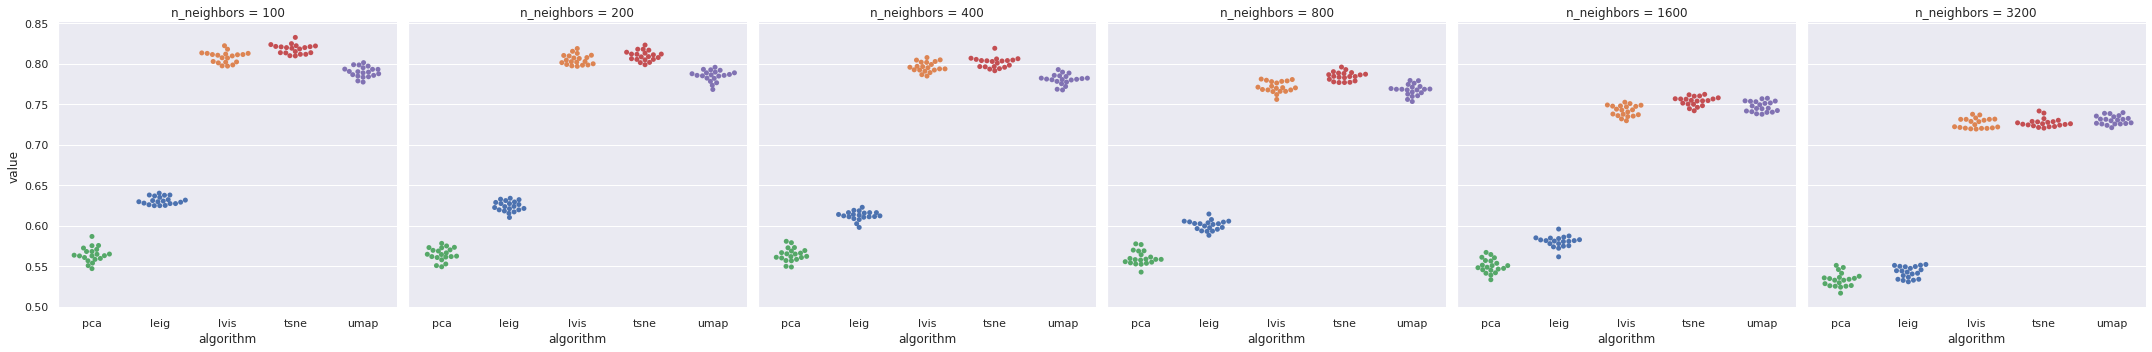

In [11]:
sns.catplot(x='algorithm', 
            y='value', 
            hue='algorithm', 
            kind='swarm', 
            col='n_neighbors',
            order=['pca', 'leig', 'lvis', 'tsne', 'umap'],
            data=tidy_df)

In [12]:
tidy_df.assign(dataset='F-MNIST').to_csv('f-mnist_crossval_results.csv')